In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import gaussian_kde
import seaborn as sns
warnings.filterwarnings("ignore")

df = pd.read_csv("transaction_data/creditcard.csv")
df.head(n = 10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [27]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

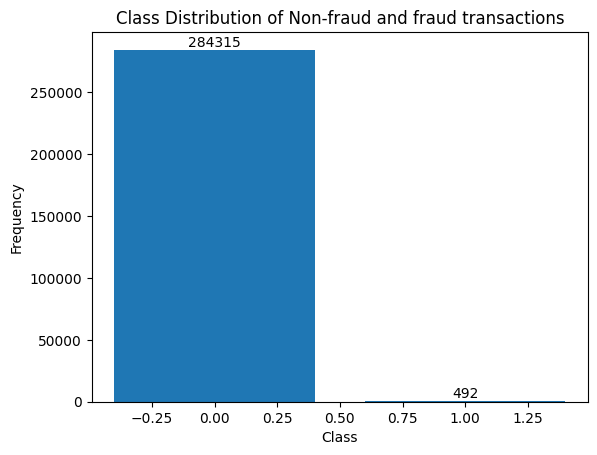

In [29]:
#distribution in classifying non-fraud and fraud
class_counts = df['Class'].value_counts()

fig, ax = plt.subplots()
bar = ax.bar(class_counts.index, class_counts.values)

for b in bar:
    yval = b.get_height()
    ax.text(b.get_x() + b.get_width()/2, yval, int(yval), ha = 'center', va = 'bottom')

ax.set_title('Class Distribution of Non-fraud and fraud transactions')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')

plt.show()

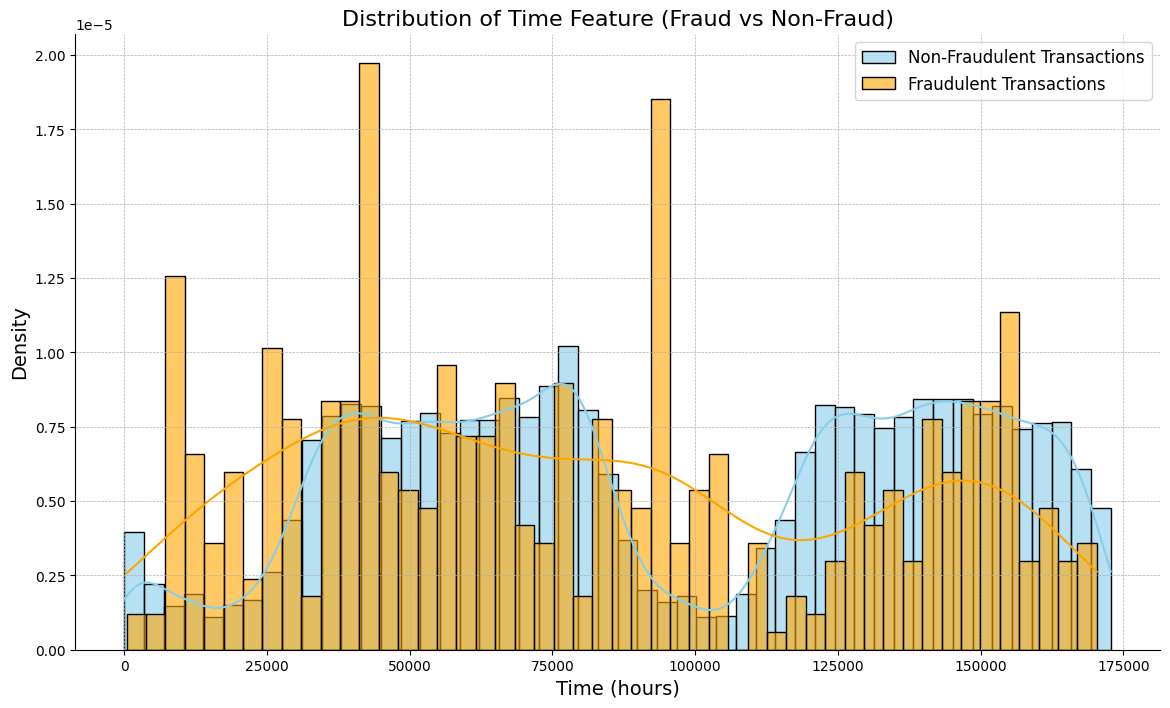

In [24]:
df_time = df['Time']
fraud_time = df[df['Class'] == 1]['Time']
non_fraud_time = df[df['Class'] == 0]['Time']

plt.figure(figsize=(14,8))

sns.histplot(non_fraud_time, bins = 50, color = 'skyblue', kde = True, stat = 'density', label = 'Non-Fraudulent Transactions', alpha = 0.6, edgecolor = 'black')
sns.histplot(fraud_time, bins = 50, color = 'orange', kde = True, stat = 'density', label = 'Fraudulent Transactions', alpha = 0.6, edgecolor = 'black')
plt.title('Distribution of Time Feature (Fraud vs Non-Fraud)', fontsize = 16)
plt.xlabel('Time (hours)', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.legend(loc = 'upper right', fontsize = 12)

plt.grid(visible = True, linestyle = '--', linewidth = 0.5)
sns.despine()

plt.show()

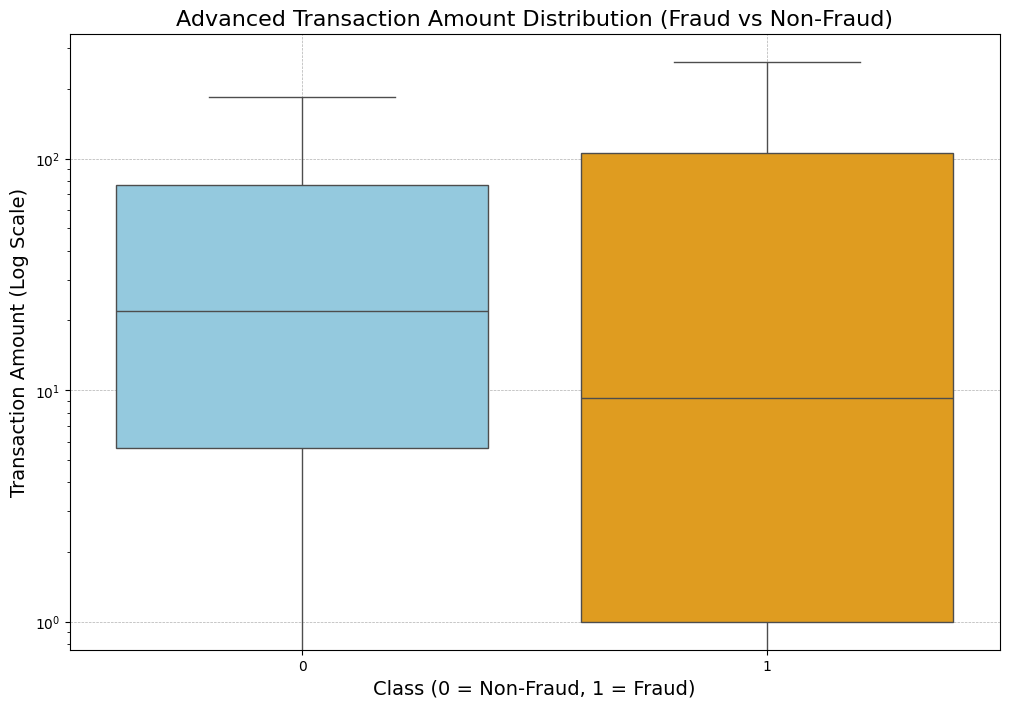

In [30]:
# Advanced Box Plot for Amounts
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Class', y='Amount', data=df, palette=['skyblue', 'orange'], showfliers=False)

# Adding annotations for the median values
for i, box in enumerate(ax.artists):
    y_median = box.get_ydata()[4]  # Median value location in the box plot
    ax.annotate(f'{y_median:.2f}', 
                (i, y_median), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', 
                color='black', 
                fontsize=12, 
                fontweight='bold')

# Apply log scale to handle skewness in transaction amounts
plt.yscale('log')
plt.title('Transaction Amount Distribution (Fraud vs Non-Fraud)', fontsize=16)
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)', fontsize=14)
plt.ylabel('Transaction Amount (Log Scale)', fontsize=14)

# Add grid for better visualization
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.show()


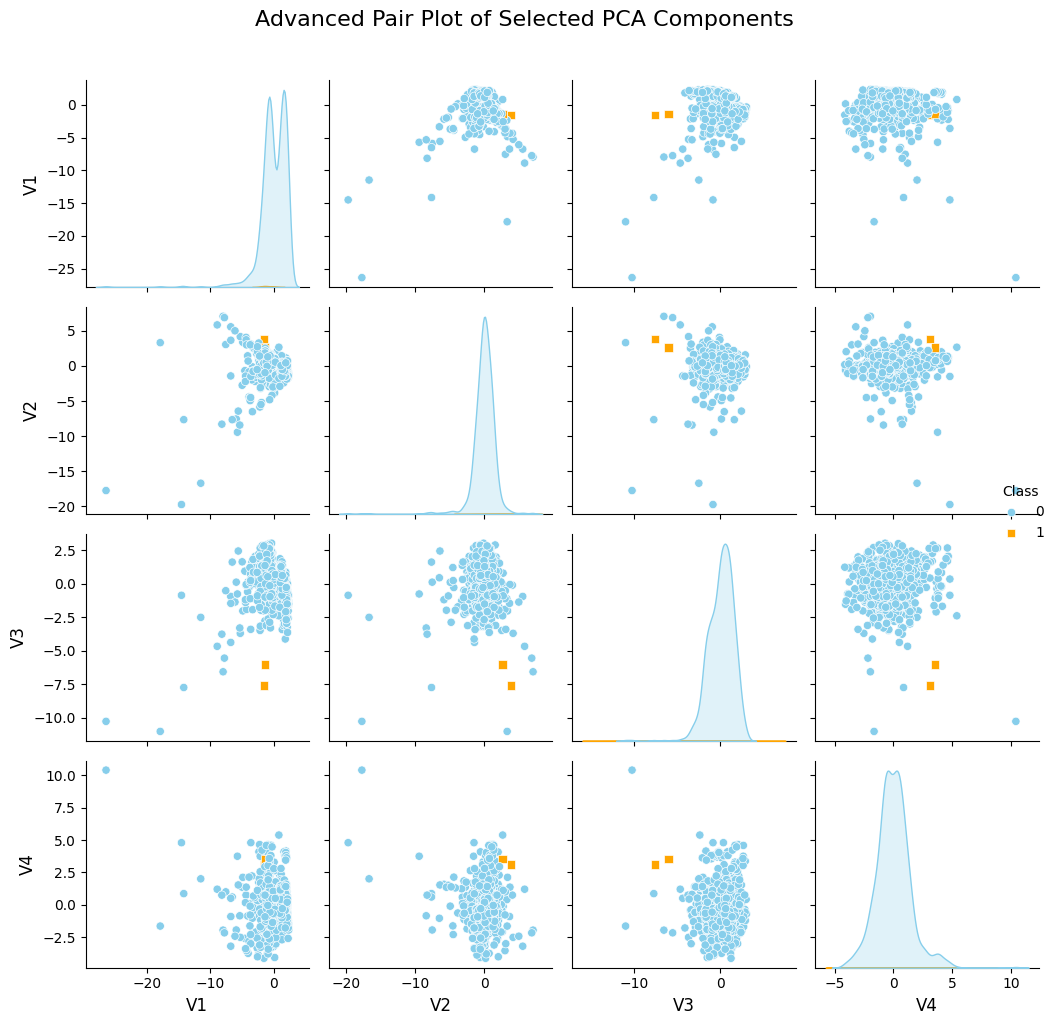

In [31]:
# Sampling a subset of the data for the pair plot
sample_df = df.sample(1000, random_state=1)

# Selecting PCA components and 'Class'
features = ['V1', 'V2', 'V3', 'V4', 'Class']

# Advanced pair plot
g = sns.pairplot(sample_df[features], hue='Class', palette=['skyblue', 'orange'], markers=['o', 's'], diag_kind='kde')

# Adding custom titles and layout
g.fig.suptitle('Advanced Pair Plot of Selected PCA Components', fontsize=16, y=1.02)
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)

# Adjusting layout
plt.tight_layout()
plt.show()
